In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statistics import mean
from sklearn.decomposition import TruncatedSVD

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#absolute path
path = '/content/drive/MyDrive/'
X_train = pd.read_csv (path + 'trainFeaturesFinal.csv', index_col='HHX')
y_train = pd.read_csv (path + 'trainTargetFinal.csv', index_col='HHX')
X_test = pd.read_csv(path + 'testFeaturesFinal.csv', index_col='HHX')
y_test = pd.read_csv(path + 'testTargetFinal.csv', index_col='HHX')

How many dimensions? We create a PCA with 10 components, then look for the "elbow" in the graph where there is a sharp dropoff in the explained variance.

Text(0, 0.5, 'Explained Variance Ratio')

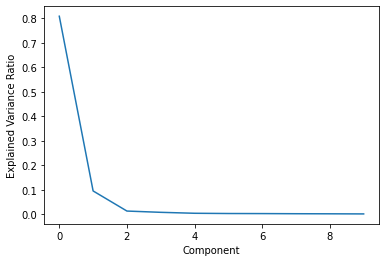

In [40]:
svd = TruncatedSVD(random_state=0, n_components=10)
svd.fit(X_train)
plt.plot(svd.explained_variance_ratio_)
plt.xlabel("Component")
plt.ylabel("Explained Variance Ratio")

It appears that the first three components explain most of the variance in the data. Now we make a new model using those two components.

In [42]:
svd = TruncatedSVD(random_state=0, n_components=3)
svd_x = svd.fit_transform(X_train)

In [44]:
## convert your array into a dataframe
df = pd.DataFrame (svd_x)

## save to xlsx file
filepath = 'X_reduced.xlsx'
df.to_excel(filepath, index=False)